<a href="https://colab.research.google.com/github/LcsGondra/Bloco-Dados/blob/master/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install palmerpenguins

In [67]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import seaborn as sns

In [68]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


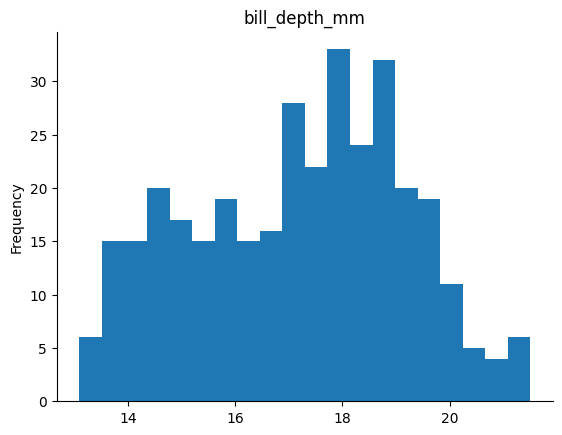

In [4]:
# @title bill_depth_mm

from matplotlib import pyplot as plt
df['bill_depth_mm'].plot(kind='hist', bins=20, title='bill_depth_mm')
plt.gca().spines[['top', 'right',]].set_visible(False)

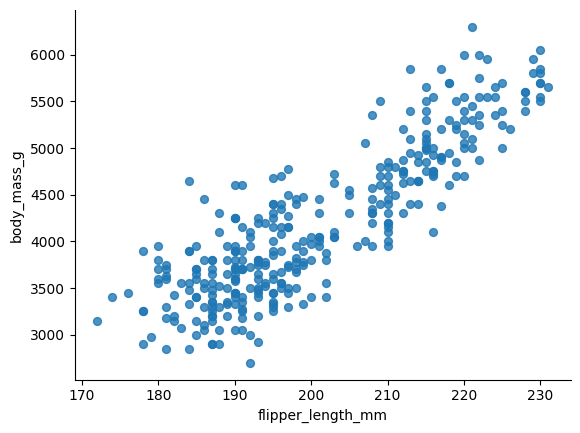

In [5]:
# @title flipper_length_mm vs body_mass_g

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='flipper_length_mm', y='body_mass_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

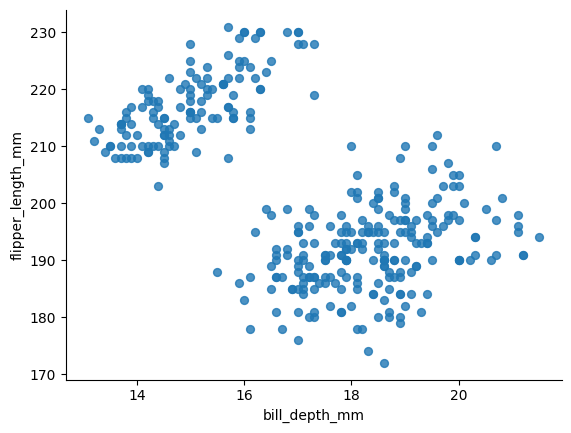

In [6]:
# @title bill_depth_mm vs flipper_length_mm

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bill_depth_mm', y='flipper_length_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

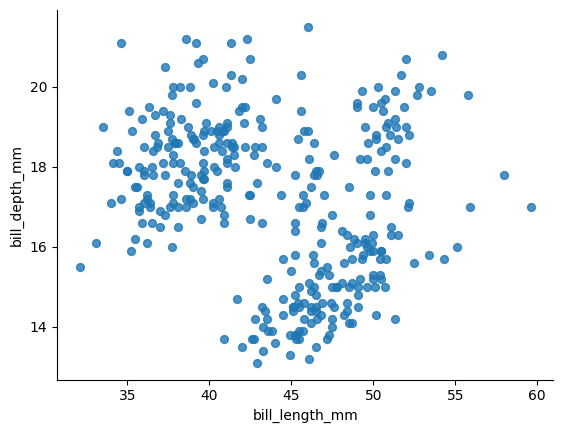

In [7]:
# @title bill_length_mm vs bill_depth_mm

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [9]:
def pow2(X):
  return X*X

In [10]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(pow2)
# df.bill_depth_mm = transformer.transform(df.bill_depth_mm)

In [11]:
from sklearn.preprocessing import PowerTransformer
df_transformado = df.copy()

pt = PowerTransformer()
df_transformado['flipper_yeo'] = pt.fit_transform(df_transformado[['flipper_length_mm']])
df_transformado.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,flipper_yeo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,-1.580741
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,-1.104687
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,-0.339985
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,-0.500529


<ipython-input-12-b307f0a3e891>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_transformado['flipper_yeo'], color='b')


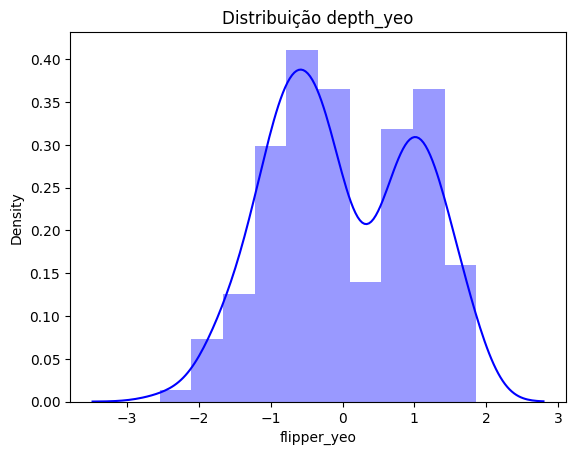

In [12]:
plt.title("Distribuição depth_yeo")
ax = sns.distplot(df_transformado['flipper_yeo'], color='b')

<ipython-input-13-101d5ce169ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_transformado['flipper_length_mm'], color='b')


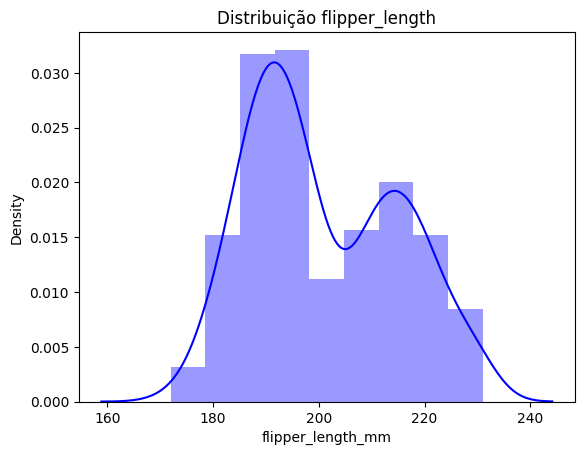

In [13]:
plt.title("Distribuição flipper_length")
ax = sns.distplot(df_transformado['flipper_length_mm'], color='b')

In [14]:
from sklearn.preprocessing import MinMaxScaler
df_min_max = df.copy()

min_max = MinMaxScaler()
df_min_max[['bill_length_mm',
'bill_depth_mm',
'flipper_length_mm',
'body_mass_g']] = min_max.fit_transform(df_min_max[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
df_min_max.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,male,2007
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,female,2007
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,0.167273,0.738095,0.355932,0.208333,female,2007


<ipython-input-15-093766fe481a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_min_max['flipper_length_mm'], color='b')


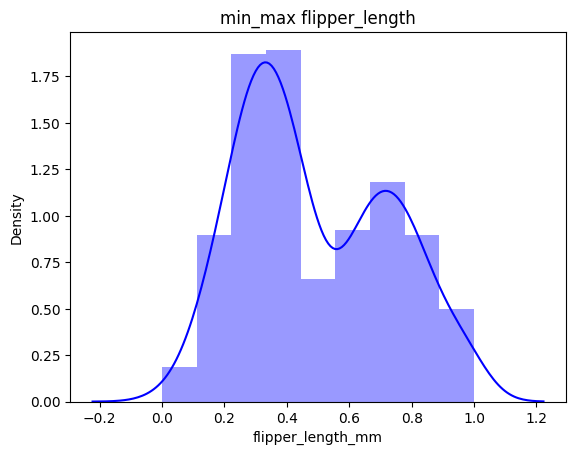

In [15]:
plt.title("min_max flipper_length")
ax = sns.distplot(df_min_max['flipper_length_mm'], color='b')

<ipython-input-16-0cb56648cd36>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_min_max['bill_depth_mm'], color='b')


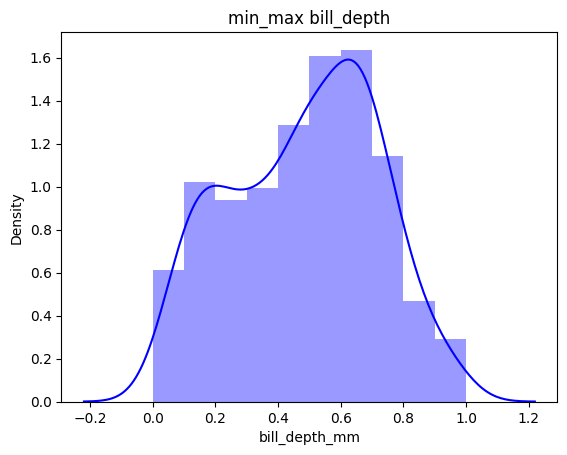

In [16]:
plt.title("min_max bill_depth")
ax = sns.distplot(df_min_max['bill_depth_mm'], color='b')

In [69]:
from sklearn.preprocessing import StandardScaler
df_std = df.copy()

std_scaler = StandardScaler()
df_std[['bill_length_mm',
'bill_depth_mm',
'flipper_length_mm',
'body_mass_g']] = std_scaler.fit_transform(df_std[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
df_std.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,-0.884499,0.785449,-1.418347,-0.564142,male,2007
1,Adelie,Torgersen,-0.811126,0.126188,-1.062250,-0.501703,female,2007
2,Adelie,Torgersen,-0.664380,0.430462,-0.421277,-1.188532,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,-1.324737,1.089724,-0.563715,-0.938776,female,2007


In [ ]:
plt.title("std_scaler flipper_length")
ax = sns.distplot(df_std['flipper_length_mm'], color='b')

In [19]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [20]:
df['bill_depth_cut'] = pd.cut(df.bill_depth_mm,bins=3,right=True, labels=['shallow', 'medium', 'deep'])
pd.cut(df.bill_depth_mm,bins=3,right=True, labels=['shallow', 'medium', 'deep'])

0      medium
1      medium
2      medium
3         NaN
4        deep
        ...  
339      deep
340    medium
341    medium
342      deep
343    medium
Name: bill_depth_mm, Length: 344, dtype: category
Categories (3, object): ['shallow' < 'medium' < 'deep']

In [21]:
df['bill_depth_cut'].value_counts()

bill_depth_cut
medium     158
shallow    103
deep        81
Name: count, dtype: int64

In [22]:
df['bill_depth_qcut'] = pd.qcut(df.bill_depth_mm,q=3, labels=['shallow', 'medium', 'deep'])
pd.qcut(df.bill_depth_mm,q=3, labels=['shallow', 'medium', 'deep'])

0        deep
1      medium
2      medium
3         NaN
4        deep
        ...  
339      deep
340    medium
341    medium
342      deep
343      deep
Name: bill_depth_mm, Length: 344, dtype: category
Categories (3, object): ['shallow' < 'medium' < 'deep']

In [23]:
df['bill_depth_qcut'].value_counts()

bill_depth_qcut
shallow    116
medium     114
deep       112
Name: count, dtype: int64

transforma feature string em numero(acabei nao usando a feature 'island')

In [71]:
from sklearn.preprocessing import LabelEncoder

island = df.island
label_encoder = LabelEncoder()
encoded_island = label_encoder.fit_transform(island)
df['island'] = encoded_island

nan pra media

In [25]:
y = df.species
feature_names = ['bill_length_mm',
'bill_depth_mm',
'flipper_length_mm',
'body_mass_g']

df[feature_names] = df[feature_names].fillna(df[feature_names].mean())

X = df[feature_names]

nan deletados

In [73]:
df = df.dropna()

y = df.species
feature_names = ['bill_length_mm',
'bill_depth_mm',
'flipper_length_mm',
'body_mass_g']

X = df[feature_names]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)

KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_X_scaled, train_y)

KNeighborsClassifier(n_neighbors=7)

In [30]:
from sklearn.metrics import accuracy_score

knn_pred_y = knn.predict(val_X_scaled)

knn_accuracy = accuracy_score(val_y, knn_pred_y)
print("knn Accuracy:", knn_accuracy)

knn Accuracy: 1.0


Naive bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive.fit(train_X_scaled, train_y)

GaussianNB()

In [32]:
nb_pred_y =naive.predict(val_X_scaled)

nb_accuracy = accuracy_score(val_y, nb_pred_y)
print("naive Accuracy:", nb_accuracy)

naive Accuracy: 0.99


Ridge

In [79]:
encoded_sex = label_encoder.fit_transform(df.sex)
encoded_island = label_encoder.fit_transform(df.island)
encoded_species = label_encoder.fit_transform(df.species)
df['sex'] = encoded_sex
df['island'] = encoded_island
df['species'] = encoded_species

In [96]:
df_std = df.copy()

std_scaler = StandardScaler()
df_std[['bill_length_mm','bill_depth_mm','flipper_length_mm','species']] = std_scaler.fit_transform(df_std[['bill_length_mm','bill_depth_mm','flipper_length_mm','species']])
df_std.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,-1.034374,2,-0.896042,0.780732,-1.426752,3750.0,1,2007
1,-1.034374,2,-0.822788,0.119584,-1.069474,3800.0,0,2007
2,-1.034374,2,-0.676280,0.424729,-0.426373,3250.0,0,2007
4,-1.034374,2,-1.335566,1.085877,-0.569284,3450.0,0,2007
5,-1.034374,2,-0.859415,1.747026,-0.783651,3650.0,1,2007


In [124]:
df = df.dropna()

y = df.body_mass_g

X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','species']]


In [125]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y ,test_size=0.3, random_state=64)

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)

In [127]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5)
ridge.fit(train_X_scaled, train_y)

Ridge(alpha=5)

In [128]:
from sklearn.metrics import mean_squared_error

rg_pred_y = ridge.predict(val_X_scaled)

mse = mean_squared_error(val_y, rg_pred_y)
print("ridge mean:", mse)

ridge mean: 131197.4054014286


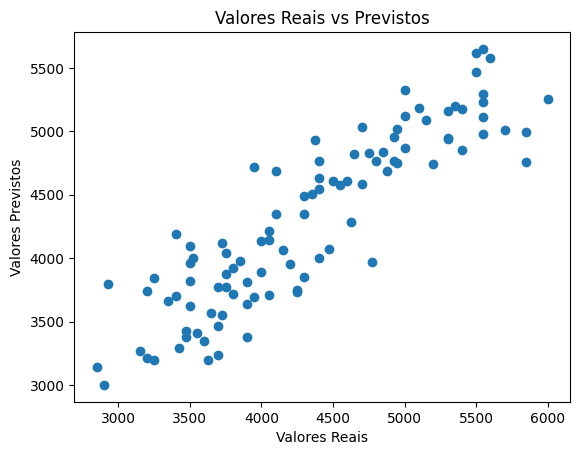

In [129]:
plt.scatter(val_y, rg_pred_y)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()